# Defects/No-Defect Classification

In [ ]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install gdown

In [ ]:
# get the data set
import zipfile

!gdown https://drive.google.com/uc?id=1ODEDCLVdkCIdyT7otYkzJbbkebAp975P

# Unzip the downloaded file

zip_ref = zipfile.ZipFile('processed.zip')
zip_ref.extractall()
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1ODEDCLVdkCIdyT7otYkzJbbkebAp975P
To: /content/processed.zip
100% 542M/542M [00:05<00:00, 102MB/s] 


In [ ]:
class_names = ['defects', 'no_defects']

In [ ]:
def view_random_image(target_dir, target_class):
    """Display and return an image from a target directory for a specific class
        
        Parameters
        ----------
        target_dir: str
            The target directory to randomly select an image
        target_class: str
            The target class to select an image from i.e defects/no-defects
            
        Example
        -------
        img = view_random_image('processed/train', 'defects')
    """
    
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = load_img(target_folder + '/' + random_image[0], color_mode='grayscale')
    img = img_to_array(img)
    img = img[:,:,0] # get rid of the last dimension so we plot only grayscale
    plt.imshow(img, cmap='gray')
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}')
    return img

Image shape: (512, 512)


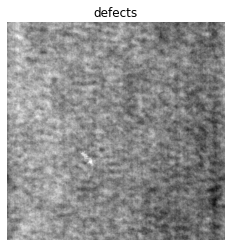

In [ ]:
img = view_random_image('processed/train/', 'defects')

Image shape: (512, 512)


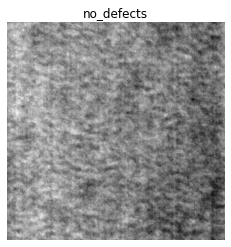

In [ ]:
img = view_random_image('processed/train/', 'no_defects')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

# directories
train_dir = 'processed/train'
test_dir = 'processed/test'

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               color_mode='rgb',
                                               shuffle=True,
                                                seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                             color_mode='rgb',
                                               shuffle=True,
                                                seed=42)

Found 2025 images belonging to 2 classes.
Found 675 images belonging to 2 classes.


In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)
  print(f'Saving Tensorboard log files to {log_dir}')
  return tensorboard_callback

In [ ]:
# build model

model_1 = tf.keras.models.Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 774400)            0         
                                                                 
 dense (Dense)               (None, 1)                 774401    
                                                                 
Total params: 813,121
Trainable params: 813,121
Non-trainable params: 0
__________________________________________________

In [ ]:
model_1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_1 = model_1.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback('tensorflow_hub', 'model_1')])

Saving Tensorboard log files to tensorflow_hub/model_1/20220513-111737
Epoch 1/5
64/64 [==============================] - 41s 349ms/step - loss: 0.9735 - accuracy: 0.6351 - val_loss: 0.6667 - val_accuracy: 0.6667
Epoch 2/5
64/64 [==============================] - 20s 312ms/step - loss: 0.6441 - accuracy: 0.7156 - val_loss: 0.6425 - val_accuracy: 0.7096
Epoch 3/5
64/64 [==============================] - 20s 313ms/step - loss: 0.5715 - accuracy: 0.7264 - val_loss: 0.6005 - val_accuracy: 0.7081
Epoch 4/5
64/64 [==============================] - 20s 313ms/step - loss: 0.5381 - accuracy: 0.7304 - val_loss: 0.5770 - val_accuracy: 0.7067
Epoch 5/5
64/64 [==============================] - 21s 329ms/step - loss: 0.5023 - accuracy: 0.7378 - val_loss: 0.6139 - val_accuracy: 0.7096


In [ ]:
model_2 = tf.keras.models.Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_2 = model_2.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback('tensorflow_hub', 'model_2')])

Saving Tensorboard log files to tensorflow_hub/model_2/20220513-111940
Epoch 1/5
64/64 [==============================] - 28s 412ms/step - loss: 0.6738 - accuracy: 0.6405 - val_loss: 0.6219 - val_accuracy: 0.7022
Epoch 2/5
64/64 [==============================] - 26s 398ms/step - loss: 0.5720 - accuracy: 0.7240 - val_loss: 0.5820 - val_accuracy: 0.7096
Epoch 3/5
64/64 [==============================] - 26s 401ms/step - loss: 0.5516 - accuracy: 0.7180 - val_loss: 0.5676 - val_accuracy: 0.7111
Epoch 4/5
64/64 [==============================] - 34s 536ms/step - loss: 0.5517 - accuracy: 0.7244 - val_loss: 0.5797 - val_accuracy: 0.7096
Epoch 5/5
64/64 [==============================] - 26s 397ms/step - loss: 0.5458 - accuracy: 0.7264 - val_loss: 0.5529 - val_accuracy: 0.7096


In [ ]:
model_3 = tf.keras.models.Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_3 = model_3.fit(train_data, 
                        epochs=10, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback('tensorflow_hub', 'model_3')])

Saving Tensorboard log files to tensorflow_hub/model_3/20220513-112200
Epoch 1/10
64/64 [==============================] - 20s 283ms/step - loss: 0.7009 - accuracy: 0.6538 - val_loss: 0.6412 - val_accuracy: 0.6667
Epoch 2/10
64/64 [==============================] - 17s 266ms/step - loss: 0.6192 - accuracy: 0.6919 - val_loss: 0.5909 - val_accuracy: 0.7096
Epoch 3/10
64/64 [==============================] - 18s 284ms/step - loss: 0.5594 - accuracy: 0.7264 - val_loss: 0.6151 - val_accuracy: 0.7096
Epoch 4/10
64/64 [==============================] - 17s 264ms/step - loss: 0.5664 - accuracy: 0.7254 - val_loss: 0.5694 - val_accuracy: 0.7096
Epoch 5/10
64/64 [==============================] - 17s 265ms/step - loss: 0.5453 - accuracy: 0.7264 - val_loss: 0.5668 - val_accuracy: 0.7096
Epoch 6/10
64/64 [==============================] - 17s 263ms/step - loss: 0.5394 - accuracy: 0.7264 - val_loss: 0.5669 - val_accuracy: 0.7096
Epoch 7/10
64/64 [==============================] - 17s 264ms/step - lo

In [ ]:
model_4 = tf.keras.models.Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='valid'),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_4 = model_4.fit(train_data, 
                        epochs=10, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback('tensorflow_hub', 'model_4')])

Saving Tensorboard log files to tensorflow_hub/model_4/20220513-112459
Epoch 1/10
64/64 [==============================] - 19s 280ms/step - loss: 0.6916 - accuracy: 0.6494 - val_loss: 0.6856 - val_accuracy: 0.6667
Epoch 2/10
64/64 [==============================] - 17s 270ms/step - loss: 0.6818 - accuracy: 0.6667 - val_loss: 0.6777 - val_accuracy: 0.6667
Epoch 3/10
64/64 [==============================] - 17s 271ms/step - loss: 0.6443 - accuracy: 0.6667 - val_loss: 0.6188 - val_accuracy: 0.6667
Epoch 4/10
64/64 [==============================] - 18s 279ms/step - loss: 0.6457 - accuracy: 0.6667 - val_loss: 0.6726 - val_accuracy: 0.6667
Epoch 5/10
64/64 [==============================] - 18s 280ms/step - loss: 0.6691 - accuracy: 0.6667 - val_loss: 0.6658 - val_accuracy: 0.6667
Epoch 6/10
64/64 [==============================] - 19s 299ms/step - loss: 0.6630 - accuracy: 0.6667 - val_loss: 0.6603 - val_accuracy: 0.6667
Epoch 7/10
64/64 [==============================] - 18s 275ms/step - lo

In [ ]:
model_5 = tf.keras.models.Sequential([
    Conv2D(filters=32, kernel_size=7, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=3, padding='same', strides=2),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='same'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='same'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_5 = model_5.fit(train_data, 
                        epochs=10, 
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data, 
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback('tensorflow_hub', 'model_5')])

Saving Tensorboard log files to tensorflow_hub/model_5/20220513-112802
Epoch 1/10
64/64 [==============================] - 35s 450ms/step - loss: 0.6561 - accuracy: 0.6647 - val_loss: 0.6376 - val_accuracy: 0.6667
Epoch 2/10
64/64 [==============================] - 26s 403ms/step - loss: 0.6397 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 3/10
64/64 [==============================] - 26s 403ms/step - loss: 0.6399 - accuracy: 0.6667 - val_loss: 0.6370 - val_accuracy: 0.6667
Epoch 4/10
64/64 [==============================] - 26s 404ms/step - loss: 0.6376 - accuracy: 0.6667 - val_loss: 0.6411 - val_accuracy: 0.6667
Epoch 5/10
64/64 [==============================] - 26s 405ms/step - loss: 0.6388 - accuracy: 0.6667 - val_loss: 0.6375 - val_accuracy: 0.6667
Epoch 6/10
64/64 [==============================] - 26s 404ms/step - loss: 0.6380 - accuracy: 0.6667 - val_loss: 0.6376 - val_accuracy: 0.6667
Epoch 7/10
64/64 [==============================] - 26s 403ms/step - lo

In [ ]:
def plot_loss_curves(history):
    """
    Plot loss curves and accuracy curves on separate figure object
    """
    epochs = list(range(1, len(history['loss']) + 1))
    loss = history['loss']
    val_loss = history['val_loss']
    accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']
    
    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label='accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()

history 1 loss curves


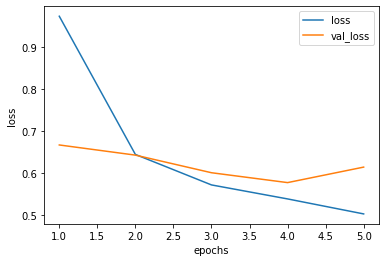

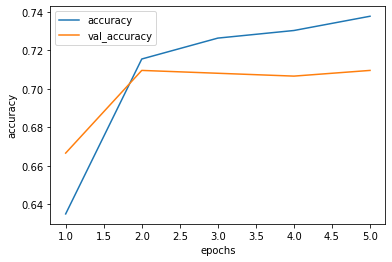

In [ ]:
print('history 1 loss curves')
plot_loss_curves(history_1.history)

history 2 loss curves


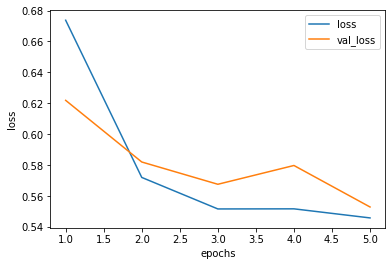

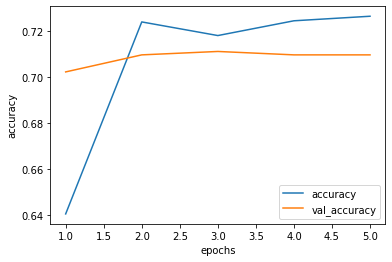

In [ ]:
print('history 2 loss curves')
plot_loss_curves(history_2.history)

history 3 loss curves


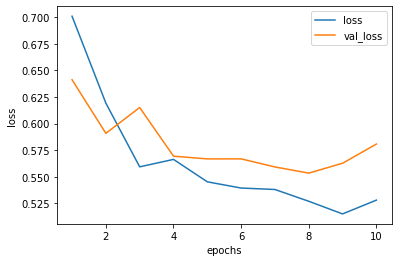

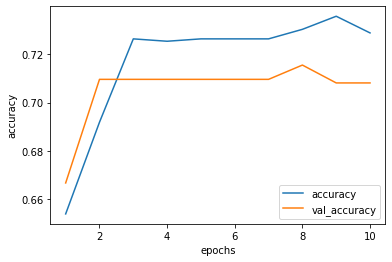

In [ ]:
print('history 3 loss curves')
plot_loss_curves(history_3.history)

history 4 loss curves


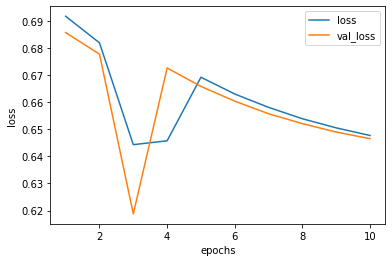

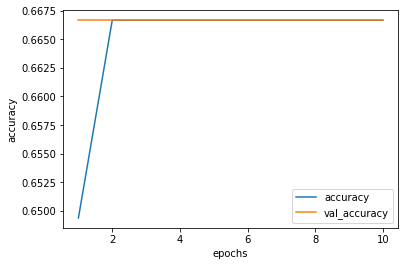

In [ ]:
print('history 4 loss curves')
plot_loss_curves(history_4.history)

From the plots, we can see that `model_1` and `model_2` are performing well

### Transfer Learning

In [ ]:
def create_model(model_url, num_classes=1):
  """
  Takes a TensorFlow Hub URL and creates a Keras Sequential model with it

  Parameters
  ----------
  model_url : str
    A TensorFlow Hub feature extraction URL.
  num_classes: int
    Number of output neurons in the output layer,
    should be equal to number of target classes, default 2

  Returns
  -------
  An uncompiled Keras Sequential model with model_url as feature extractor
  layer and Dense output layer with num_classes output neurons 
  """

  # Download the pretrained model
  feature_extraction_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           input_shape=(224, 224, 3))
  
  model = tf.keras.Sequential([
    feature_extraction_layer,
    Dense(num_classes, activation='sigmoid')
  ])

  return model

In [ ]:
model_6 = create_model('https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1')

In [ ]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense_6 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 1,281
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history_6 = model_6.fit(train_data, validation_data=test_data,
            epochs=50, steps_per_epoch=len(train_data),
            validation_steps=len(test_data),
            callbacks=[create_tensorboard_callback('tensorflow_hub', 'model_6_tl'), early_stopping])

Saving Tensorboard log files to tensorflow_hub/model_6_tl/20220513-113835
Epoch 1/50
64/64 [==============================] - 36s 301ms/step - loss: 0.5959 - accuracy: 0.6938 - val_loss: 0.5498 - val_accuracy: 0.7111
Epoch 2/50
64/64 [==============================] - 17s 265ms/step - loss: 0.5159 - accuracy: 0.7417 - val_loss: 0.4967 - val_accuracy: 0.7719
Epoch 3/50
64/64 [==============================] - 17s 262ms/step - loss: 0.4704 - accuracy: 0.7881 - val_loss: 0.4632 - val_accuracy: 0.7896
Epoch 4/50
64/64 [==============================] - 17s 263ms/step - loss: 0.4377 - accuracy: 0.8163 - val_loss: 0.4394 - val_accuracy: 0.8193
Epoch 5/50
64/64 [==============================] - 17s 260ms/step - loss: 0.4138 - accuracy: 0.8306 - val_loss: 0.4168 - val_accuracy: 0.8326
Epoch 6/50
64/64 [==============================] - 17s 270ms/step - loss: 0.3920 - accuracy: 0.8494 - val_loss: 0.4124 - val_accuracy: 0.8489
Epoch 7/50
64/64 [==============================] - 17s 265ms/step -

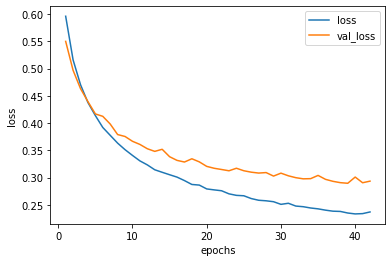

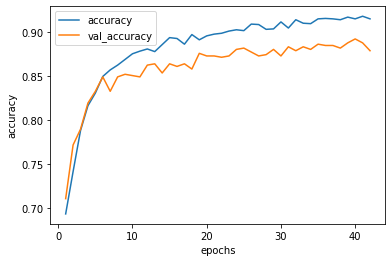

In [ ]:
plot_loss_curves(history_6.history)

In [ ]:
def make_prediction(target_class):
    target_folder = 'processed/test/' + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = load_img(target_folder + '/' + random_image[0])
    img = img_to_array(img)
    img = img / 255
    img_resize = tf.image.resize(img, size=[224, 224])
    img_expanded = tf.expand_dims(img_resize, axis=0)
    prediction = model_6.predict(img_expanded)
    plt.imshow(img[:,:,0], cmap='gray')
    plt.axis('off')
    plt.title(class_names[int(tf.round(prediction)[0])])
    print(img.shape)

(512, 512, 3)


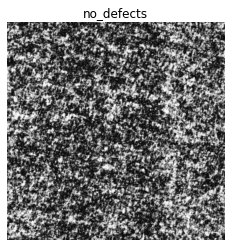

In [ ]:
make_prediction('no_defects')